## Computing the sample size at SANS

- inspired by C Gorgolewski's talk at SANS preconference 2017
- and Poldrack, 2017 NRN figure/analysis: https://github.com/poldracklab/ScanningTheHorizon/blob/master/Figure1_Power/fig_power.ipynb


In [1]:
import os, csv, re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

setting up the files (I converted to txt for ease of use)

In [2]:
path  = "/Users/Ralf/Desktop/sans_demo3/sans_programs/"
files = [ 'sans2017.txt', 
         'sans2016.txt', 
         'sans2015.txt', 
         'sans2014.txt', 
         'sans2013.txt', 
         'sans2012.txt', 
         'sans2010.txt', 
         'sans2009.txt', 
         'sans2008.txt', 
         'sans2007.txt']
files.reverse()

define a crude function to extract the Ns

In [3]:
def extract_numbers(infile):
    text_file = open(infile, "r")
    lines = text_file.readlines()
    #print len(lines)
    text_file.close()

    numbers = []
    for i in range(len(lines)):
        curr_line = lines[i]
        match = re.search(r'N=(\d+)', curr_line)
        if (match != None):
            #print(curr_line)
            numbers.append(match.group(0).strip('N='))
            #print(match.group(0))

        match = re.search(r'N = (\d+)', curr_line)
        if (match != None):
            #print(curr_line)
            numbers.append(match.group(0).strip('N ='))
            #print(match.group(0))

        match = re.search(r'n = (\d+)', curr_line)
        if (match != None):
            #print(curr_line)
            numbers.append(match.group(0).strip('n ='))
            #print(match.group(0))    
            
        match = re.search(r'n=(\d+)', curr_line)
        if (match != None):
            #print(curr_line)
            numbers.append(match.group(0).strip('n='))
            #print(match.group(0))    
            
    nns = np.asarray(numbers, dtype = int)    
    return nns

loop that function over the year's files and append the result
set up a dataframe and put the result into it

In [4]:
nums = []
for i in files:
    my_file = path + i
    #print(my_file)
    nums.append(np.median(extract_numbers(my_file) ))
    
df = pd.DataFrame()
df['years']= np.array((2007,2008,2009,2010,2012,2013,2014,2015,2016,2017))
df['median'] = nums

/Users/Ralf/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ralf/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


plot the results (with a tentative reg -line :-) )

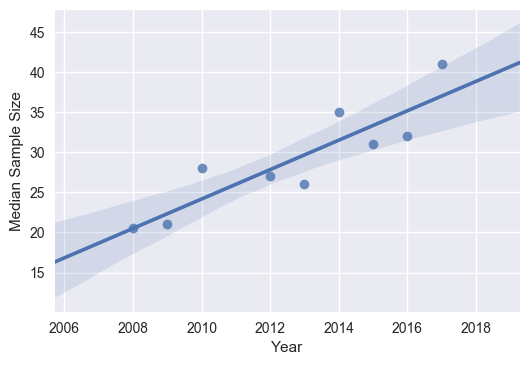

In [5]:
sns.regplot(x = 'years', y = 'median', data=df);
plt.ylabel('Median Sample Size');
plt.xlabel('Year');

#plt.plot(nums)